In [1]:
import cv2
import numpy as np

# 두 개의 윤곽선을 가장 가까운 두 점으로 연결하여 하나의 윤곽선으로 만드는 함수
def merge_contours(contours):
    # 윤곽선 간의 모든 점 쌍의 거리를 계산하여 가장 짧은 거리를 저장할 변수 초기화
    min_distance = float('inf')
    min_points = None

    # 모든 윤곽선 쌍에 대해 두 점 간의 거리를 계산하고 가장 짧은 거리를 찾음
    for i in range(len(contours)):
        for j in range(i+1, len(contours)):
            for point1 in contours[i]:
                for point2 in contours[j]:
                    distance = np.linalg.norm(point1 - point2)  # 두 점 간의 유클리드 거리 계산
                    if distance < min_distance:
                        min_distance = distance
                        min_points = (point1, point2)
    
    # 가장 가까운 두 점으로 새로운 윤곽선 생성
    new_contour = np.concatenate((min_points[0], min_points[1]))
    
    return new_contour

# 예시 윤곽선 데이터
contour1 = np.array([[100, 200], [150, 250], [200, 200]])  # 윤곽선 1
contour2 = np.array([[300, 250], [350, 200], [400, 250]])  # 윤곽선 2

# 두 개의 윤곽선을 하나의 윤곽선으로 합치기
merged_contour = merge_contours([contour1, contour2])

print("Merged Contour:", merged_contour)

Merged Contour: [200 200 300 250]


In [6]:
import cv2
import numpy as np

def find_closest_point(contour1, contour2):
    min_dist = float('inf')
    closest_point1 = None
    closest_point2 = None

    for point1 in contour1:
        for point2 in contour2:
            dist = np.linalg.norm(point1 - point2)
            if dist < min_dist:
                min_dist = dist
                closest_point1 = point1
                closest_point2 = point2

    return closest_point1, closest_point2

def merge_contours(contours):
    merged_contours = []
    
    while len(contours) > 1:
        contour1 = contours.pop(0)
        closest_contour = None
        min_dist = float('inf')
        
        for contour2 in contours:
            closest_point1, closest_point2 = find_closest_point(contour1, contour2)
            dist = np.linalg.norm(closest_point1 - closest_point2)
            
            if dist < min_dist:
                min_dist = dist
                closest_contour = contour2
        
        merged_contours.append(np.vstack((contour1, closest_contour)))
        contours.remove(closest_contour)
    
    if len(contours) == 1:
        merged_contours.append(contours[0])
    
    return merged_contours

# 예시로 주어진 contours
contours = [
    np.array([[100, 100], [200, 100], [200, 200], [100, 200]]),
    np.array([[300, 300], [400, 300], [400, 400], [300, 400]])
]

# Contours 병합
merged_contours = merge_contours(contours)

# YOLO segmentation 형태로 변환
yolo_segmentation = np.zeros((500, 500), dtype=np.uint8)
for contour in merged_contours:
    cv2.drawContours(yolo_segmentation, [contour], -1, (255), -1)

cv2.imshow('YOLO Segmentation', yolo_segmentation)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:
import cv2
import numpy as np

def find_closest_points(contour1, contour2):
    min_dist = float('inf')
    closest_point1 = None
    closest_point2 = None

    for point1 in contour1:
        for point2 in contour2:
            dist = np.linalg.norm(point1 - point2)
            if dist < min_dist:
                min_dist = dist
                closest_point1 = point1
                closest_point2 = point2

    return closest_point1, closest_point2

def merge_closest_contours(contours):
    min_dist = float('inf')
    closest_contour1 = None
    closest_contour2 = None

    for i, contour1 in enumerate(contours):
        for j, contour2 in enumerate(contours):
            if i != j:
                closest_point1, closest_point2 = find_closest_points(contour1, contour2)
                dist = np.linalg.norm(closest_point1 - closest_point2)
                if dist < min_dist:
                    min_dist = dist
                    closest_contour1 = i
                    closest_contour2 = j
    
    merged_contour = np.vstack((contours[closest_contour1], contours[closest_contour2]))

    return [merged_contour]

# 예시로 주어진 contours
contours = [
    np.array([[100, 100], [200, 100], [200, 200], [100, 200]]),
    np.array([[300, 300], [400, 300], [400, 400], [300, 400]])
]

# Contours 병합
merged_contours = merge_closest_contours(contours)

# YOLO segmentation 형태로 변환
yolo_segmentation = np.zeros((500, 500), dtype=np.uint8)
cv2.drawContours(yolo_segmentation, merged_contours, -1, (255), -1)

cv2.imshow('YOLO Segmentation', yolo_segmentation)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
import cv2 
import numpy as np 
from utils.general import *
from collections import OrderedDict
def seg_flatten(poly):
        seg = [] 
        for i in poly:
            a = i.flatten()
            print(a)
            l = [] 
            for j in a:
                j = j# 이미지 1/2배 했을 때 
                l.append(j)

        return list(map(int, seg))

refer = json_dict("C:/Users/sim2real/Desktop/personalProject/dataconfirm/make_seg/refer/img_coor.json")
js = "C:/Users/sim2real/Desktop/personalProject/dataconfirm/make_seg/datasets/20240119-113614.360766.json"
im = cv2.imread("C:/Users/sim2real/Desktop/personalProject/dataconfirm/make_seg/datasets/KakaoTalk_20240322_152301366.png")
js = json_dict(js)
nf = js["nfire"]

for i in nf:
    seg_dict=OrderedDict()
    coord_bgr = list(refer[str(i)])
    #print(coord_bgr)
    coor = np.array([coord_bgr[2],coord_bgr[1],coord_bgr[0]],dtype="int64")
    img_mask = cv2.inRange(im,coor,coor)
    contours,_ = cv2.findContours(img_mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_TC89_L1)
    if len(contours) > 1:
        print(contours)
        print(seg_flatten(contours))
        

    


(array([[[1631,  604]],

       [[1631,  606]],

       [[1648,  607]],

       [[1651,  606]],

       [[1651,  604]]], dtype=int32), array([[[1563,  604]],

       [[1562,  607]],

       [[1620,  606]],

       [[1620,  604]]], dtype=int32))
[1631  604 1631  606 1648  607 1651  606 1651  604]
[1563  604 1562  607 1620  606 1620  604]
[604, 1620, 606, 1620, 607, 1562, 604, 1563, 604, 1651, 606, 1651, 607, 1648, 606, 1631, 604, 1631]
(array([[[413, 574]],

       [[412, 577]],

       [[440, 578]],

       [[443, 577]],

       [[443, 574]]], dtype=int32), array([[[351, 574]],

       [[350, 577]],

       [[405, 577]],

       [[407, 574]]], dtype=int32), array([[[335, 574]],

       [[335, 577]],

       [[343, 576]],

       [[344, 574]]], dtype=int32))
[413 574 412 577 440 578 443 577 443 574]
[351 574 350 577 405 577 407 574]
[335 574 335 577 343 576 344 574]
[574, 344, 576, 343, 577, 335, 574, 335, 574, 407, 577, 405, 577, 350, 574, 351, 574, 443, 577, 443, 578, 440, 577, 412, 5

In [26]:
import numpy as np

def equalize_contour_lengths(contours):
    max_length = max(len(contour) for contour in contours)  # 최대 컨투어 길이 계산
    equalized_contours = []
    for contour in contours:
        if len(contour) < max_length:  # 최대 길이에 도달하지 못한 경우
            # 컨투어 길이를 최대 길이에 맞춰줌
            contour = np.concatenate([contour, np.repeat(contour[-1][None], max_length - len(contour), axis=0)])
        equalized_contours.append(contour)
    return equalized_contours

def flatten_contours(contours):
    flattened_contours = np.vstack(contours)  # 모든 컨투어를 수직으로 쌓음
    unique_points = np.unique(flattened_contours, axis=0)  # 중복된 점을 제거

    # 중복을 제거한 점들 사이의 거리 계산
    distances = np.linalg.norm(unique_points[:, None] - unique_points[None, :], axis=-1)

    # 대각선 값을 최대값으로 설정
    np.fill_diagonal(distances, np.inf)

    # 가장 가까운 점의 인덱스 찾기
    closest_indices = np.argmin(distances, axis=1)

    # 가장 가까운 점으로 플래튼
    flattened_contours = unique_points[closest_indices]

    return flattened_contours

# 주어진 컨투어들
contours1 = np.array([[[1631, 604]],
                      [[1631, 606]],
                      [[1648, 607]],
                      [[1651, 606]],
                      [[1651, 604]]], dtype=np.int32)

contours2 = np.array([[[1563, 604]],
                      [[1562, 607]],
                      [[1620, 606]],
                      [[1620, 604]]], dtype=np.int32)

# 컨투어들의 길이를 동일하게 맞춤
contours1, contours2 = equalize_contour_lengths([contours1, contours2])

# 컨투어들을 하나로 플래튼
flattened_contours = flatten_contours([contours1, contours2])

print(flattened_contours)


ValueError: All dimensions of input must be of equal length

In [27]:
import numpy as np

def flatten_contour(contour):
    # 컨투어를 1차원 배열로 평평하게 만듭니다.
    return contour.reshape(-1, 2)

def find_closest_point(point, points):
    # 주어진 점과 점들의 배열 사이의 거리를 계산하고 가장 가까운 점의 인덱스를 반환합니다.
    distances = np.linalg.norm(points - point, axis=1)
    return np.argmin(distances)

def flatten_contours(contours):
    # 각 컨투어를 평평하게 만듭니다.
    flat_contours = [flatten_contour(contour) for contour in contours]
    # 모든 점들을 하나의 배열로 합칩니다.
    all_points = np.concatenate(flat_contours)
    # 중복되는 점들을 제거합니다.
    unique_points = np.unique(all_points, axis=0)
    # 결과로 사용할 배열을 초기화합니다.
    flattened_contours = []
    # 각 컨투어에 대해 가장 가까운 점을 찾아 결과 배열에 추가합니다.
    for contour in flat_contours:
        flattened_contour = []
        for point in contour:
            closest_point_index = find_closest_point(point, unique_points)
            closest_point = unique_points[closest_point_index]
            flattened_contour.append(closest_point)
        flattened_contours.append(np.array(flattened_contour))
    return flattened_contours

# 주어진 컨투어들
contours1 = np.array([[[1631, 604]],
                      [[1631, 606]],
                      [[1648, 607]],
                      [[1651, 606]],
                      [[1651, 604]]], dtype=np.int32)

contours2 = np.array([[[1563, 604]],
                      [[1562, 607]],
                      [[1620, 606]],
                      [[1620, 604]]], dtype=np.int32)

# 컨투어들을 하나로 플래튼
flattened_contours = flatten_contours([contours1, contours2])

print(flattened_contours)


[array([[1631,  604],
       [1631,  606],
       [1648,  607],
       [1651,  606],
       [1651,  604]]), array([[1563,  604],
       [1562,  607],
       [1620,  606],
       [1620,  604]])]


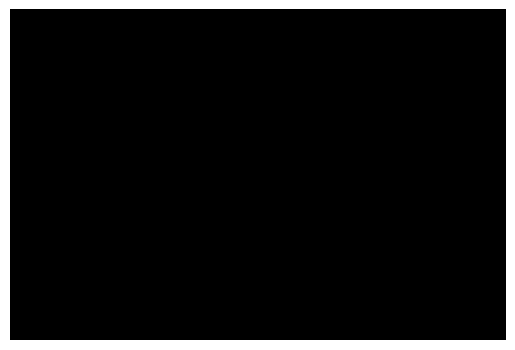

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_contours(image, contours):
    # 이미지를 복사하여 시각화에 사용합니다.
    image_copy = np.copy(image)
    # 각 컨투어에 대해 빨간색으로 점들을 그립니다.
    for contour in contours:
        for point in contour:
            cv2.circle(image_copy, tuple(point), 2, (0, 0, 255), -1)
    # 이미지를 플로팅합니다.
    plt.imshow(image_copy)
    plt.axis('off')
    plt.show()

# 빈 이미지 생성
image = np.zeros((800, 1200, 3), dtype=np.uint8)

# 주어진 컨투어들
contours1 = np.array([[[1631, 604]],
                      [[1631, 606]],
                      [[1648, 607]],
                      [[1651, 606]],
                      [[1651, 604]]], dtype=np.int32)

contours2 = np.array([[[1563, 604]],
                      [[1562, 607]],
                      [[1620, 606]],
                      [[1620, 604]]], dtype=np.int32)

# 컨투어들을 하나로 플래튼
flattened_contours = flatten_contours([contours1, contours2])

# 이미지에 컨투어를 시각화하여 플로팅
plot_contours(image, flattened_contours)


In [29]:
def convert_to_yolo_format(contours):
    yolo_format = []
    for contour in contours:
        # 컨투어의 최소 바운딩 박스 계산
        x_min = min(point[0] for point in contour)
        y_min = min(point[1] for point in contour)
        # 바운딩 박스의 폭과 높이를 1로 설정
        width = 1
        height = 1
        # 클래스는 모두 0으로 설정
        class_id = 0
        # YOLO 포맷에 추가
        yolo_format.append([class_id, )
    return yolo_format

# 주어진 컨투어들
contours1 = np.array([[[1631, 604]],
                      [[1631, 606]],
                      [[1648, 607]],
                      [[1651, 606]],
                      [[1651, 604]]], dtype=np.int32)

contours2 = np.array([[[1563, 604]],
                      [[1562, 607]],
                      [[1620, 606]],
                      [[1620, 604]]], dtype=np.int32)

# 컨투어들을 하나로 플래튼
flattened_contours = flatten_contours([contours1, contours2])

# YOLO 포맷으로 변환
yolo_segmentation_format = convert_to_yolo_format(flattened_contours)

print(yolo_segmentation_format)


[[0, 1631, 604, 1, 1], [0, 1562, 604, 1, 1]]


In [30]:
def seg_flatten(poly):
    seg = [] 
    for i in poly:
        a = i.flatten()
        
        for j in a:
            j = j
            seg.append(j)

    return list(map(int, seg))

# 입력 다각형(poly)의 예제
poly = np.array([[[[1631, 604]],
                 [[1631, 606]],
                 [[1648, 607]],
                 [[1651, 606]],
                 [[1651, 604]]],
                  [[[1563, 604]],
                      [[1562, 607]],
                      [[1620, 606]],
                      [[1620, 604]]]] dtype=np.int32)

# 함수 호출
result = seg_flatten(poly)

# 결과 출력
print(result)


[1631, 604, 1631, 606, 1648, 607, 1651, 606, 1651, 604]


In [ ]:

(array([[[1631,  604]],

       [[1631,  606]],

       [[1648,  607]],

       [[1651,  606]],

       [[1651,  604]]], dtype=int32), array([[[1563,  604]],

       [[1562,  607]],

       [[1620,  606]],

       [[1620,  604]]], dtype=int32))

In [37]:
def seg_flatten(poly):
        seg = [] 
        for i in poly:
            a = i.flatten()
            
            for j in a:
                j = j# 이미지 1/2배 했을 때 
                seg.append(j)

        return list(map(int, seg))

# 입력 다각형(poly)의 예제
poly = np.array([[[1631,  604]],

       [[1631,  606]],

       [[1648,  607]],

       [[1651,  606]],

       [[1651,  604]]], dtype=np.int32), 
pol2 = np.array([[[1563,  604]],

       [[1562,  607]],

       [[1620,  606]],

       [[1620,  604]]], dtype=np.int32)
# 함수 호출
result = seg_flatten(poly)

# 결과 출력
result2 = seg_flatten((pol2))

In [38]:
print(result,result2)

[1631, 604, 1631, 606, 1648, 607, 1651, 606, 1651, 604] [1563, 604, 1562, 607, 1620, 606, 1620, 604]


In [43]:
import numpy as np

def connect_closest_points(contour1, contour2):
    # 두 컨투어를 평탄화합니다.
    flat_contour1 = contour1.flatten()
    flat_contour2 = contour2.flatten()

    # 두 컨투어의 모든 점들 사이의 거리를 계산합니다.
    distances = np.linalg.norm(flat_contour1[:, None] - flat_contour2[None, :], axis=-1)

    # 두 컨투어를 연결하기 위해 가장 가까운 점끼리 순서대로 연결합니다.
    connected_points = []
    while len(connected_points) < len(contour1) * 2:
        min_index = np.argmin(distances)
        # 1차원 인덱스를 평탄화된 배열의 인덱스로 변환합니다.
        min_index_i = min_index // flat_contour2.shape[0]
        min_index_j = min_index % flat_contour2.shape[0]
        connected_points.extend([flat_contour1[min_index_i], flat_contour2[min_index_j]])
        # 사용된 점들은 무한대로 설정하여 더 이상 고려하지 않도록 합니다.
        distances[min_index_i, :] = np.inf
        distances[:, min_index_j] = np.inf

    return connected_points

# 주어진 컨투어들
contours1 = np.array([[[1631, 604]],
                      [[1631, 606]],
                      [[1648, 607]],
                      [[1651, 606]],
                      [[1651, 604]]], dtype=np.int32)

contours2 = np.array([[[1563, 604]],
                      [[1562, 607]],
                      [[1620, 606]],
                      [[1620, 604]]], dtype=np.int32)

# 두 컨투어를 연결하여 하나의 리스트로 만듭니다.
connected_points = connect_closest_points(contours1, contours2)

print(connected_points)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [44]:
import numpy as np

def connect_closest_points(contour1, contour2):
    # 두 컨투어를 평탄화합니다.
    flat_contour1 = contour1.flatten()
    flat_contour2 = contour2.flatten()

    # 두 컨투어의 모든 점들 사이의 거리를 계산합니다.
    distances = np.linalg.norm(flat_contour1[:, None] - flat_contour2[None, :], axis=-1)

    # 두 컨투어를 연결하기 위해 가장 가까운 점끼리 순서대로 연결합니다.
    connected_points = []
    while len(connected_points) < len(contour1) * 2:
        min_index = np.argmin(distances)
        # 1차원 인덱스를 평탄화된 배열의 인덱스로 변환합니다.
        min_index_i = min_index // flat_contour2.shape[0]
        min_index_j = min_index % flat_contour2.shape[0]
        connected_points.extend([flat_contour1[min_index_i], flat_contour2[min_index_j]])
        # 사용된 점들은 무한대로 설정하여 더 이상 고려하지 않도록 합니다.
        distances[min_index_i, :] = np.inf
        distances[:, min_index_j] = np.inf

    return connected_points

# 주어진 컨투어들
contours1 = np.array([[[1631, 604]],
                      [[1631, 606]],
                      [[1648, 607]],
                      [[1651, 606]],
                      [[1651, 604]]], dtype=np.int32)

contours2 = np.array([[[1563, 604]],
                      [[1562, 607]],
                      [[1620, 606]],
                      [[1620, 604]]], dtype=np.int32)

# 두 컨투어를 연결하여 하나의 리스트로 만듭니다.
connected_points = connect_closest_points(contours1, contours2)

print(connected_points)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [45]:
import numpy as np

def connect_closest_points(contour1, contour2):
    # 두 컨투어를 평탄화합니다.
    flat_contour1 = contour1.flatten()
    flat_contour2 = contour2.flatten()

    # 두 컨투어의 모든 점들 사이의 거리를 계산합니다.
    distances = np.linalg.norm(flat_contour1[:, None] - flat_contour2[None, :], axis=-1)

    # 두 컨투어를 연결하기 위해 가장 가까운 점끼리 순서대로 연결합니다.
    connected_points = []
    while len(connected_points) < len(contour1) * 2:
        min_index = np.argmin(distances)
        # 1차원 인덱스를 평탄화된 배열의 인덱스로 변환합니다.
        min_index_i = min_index // distances.shape[1]
        min_index_j = min_index % distances.shape[1]
        connected_points.extend([flat_contour1[min_index_i], flat_contour2[min_index_j]])
        # 사용된 점들은 무한대로 설정하여 더 이상 고려하지 않도록 합니다.
        distances[min_index_i * distances.shape[1] + min_index_j] = np.inf

    return connected_points

# 주어진 컨투어들
contours1 = np.array([[[1631, 604]],
                      [[1631, 606]],
                      [[1648, 607]],
                      [[1651, 606]],
                      [[1651, 604]]], dtype=np.int32)

contours2 = np.array([[[1563, 604]],
                      [[1562, 607]],
                      [[1620, 606]],
                      [[1620, 604]]], dtype=np.int32)

# 두 컨투어를 연결하여 하나의 리스트로 만듭니다.
connected_points = connect_closest_points(contours1, contours2)

print(connected_points)


IndexError: tuple index out of range

In [46]:
import numpy as np

def connect_closest_points(contour1, contour2):
    # 두 컨투어를 평탄화합니다.
    flat_contour1 = contour1.flatten()
    flat_contour2 = contour2.flatten()

    # 두 컨투어의 모든 점들 사이의 거리를 계산합니다.
    distances = np.linalg.norm(flat_contour1[:, None] - flat_contour2[None, :], axis=-1)

    # 두 컨투어를 연결하기 위해 가장 가까운 점끼리 순서대로 연결합니다.
    connected_points = []
    while len(connected_points) < len(contour1) * 2:
        min_index = np.argmin(distances)
        # 1차원 인덱스를 평탄화된 배열의 인덱스로 변환합니다.
        min_index_i = min_index // distances.shape[0]
        min_index_j = min_index % distances.shape[0]
        connected_points.extend([flat_contour1[min_index_i], flat_contour2[min_index_j]])
        # 사용된 점들은 무한대로 설정하여 더 이상 고려하지 않도록 합니다.
        distances[min_index] = np.inf

    return connected_points

# 주어진 컨투어들
contours1 = np.array([[[1631, 604]],
                      [[1631, 606]],
                      [[1648, 607]],
                      [[1651, 606]],
                      [[1651, 604]]], dtype=np.int32)

contours2 = np.array([[[1563, 604]],
                      [[1562, 607]],
                      [[1620, 606]],
                      [[1620, 604]]], dtype=np.int32)

# 두 컨투어를 연결하여 하나의 리스트로 만듭니다.
connected_points = connect_closest_points(contours1, contours2)

print(connected_points)


IndexError: index 9 is out of bounds for axis 0 with size 8

In [47]:
import numpy as np

def connect_closest_points(contour1, contour2):
    # 두 컨투어를 평탄화합니다.
    flat_contour1 = contour1.flatten()
    flat_contour2 = contour2.flatten()

    # 두 컨투어의 모든 점들 사이의 거리를 계산합니다.
    distances = np.linalg.norm(flat_contour1[:, None] - flat_contour2[None, :], axis=-1)

    # 두 컨투어를 연결하기 위해 가장 가까운 점끼리 순서대로 연결합니다.
    connected_points = []
    while len(connected_points) < len(contour1) * 2:
        min_index = np.argmin(distances)
        # 1차원 인덱스를 평탄화된 배열의 인덱스로 변환합니다.
        min_index_i = min_index // flat_contour2.shape[0]
        min_index_j = min_index % flat_contour2.shape[0]
        connected_points.extend([flat_contour1[min_index_i * 2], flat_contour2[min_index_j * 2]])
        # 사용된 점들은 무한대로 설정하여 더 이상 고려하지 않도록 합니다.
        distances[min_index] = np.inf

    return connected_points

# 주어진 컨투어들
contours1 = np.array([[[1631, 604]],
                      [[1631, 606]],
                      [[1648, 607]],
                      [[1651, 606]],
                      [[1651, 604]]], dtype=np.int32)

contours2 = np.array([[[1563, 604]],
                      [[1562, 607]],
                      [[1620, 606]],
                      [[1620, 604]]], dtype=np.int32)

# 두 컨투어를 연결하여 하나의 리스트로 만듭니다.
connected_points = connect_closest_points(contours1, contours2)

print(connected_points)


IndexError: index 10 is out of bounds for axis 0 with size 8

In [48]:
import numpy as np

def connect_closest_points(contour1, contour2):
    # 두 컨투어를 평탄화합니다.
    flat_contour1 = contour1.flatten()
    flat_contour2 = contour2.flatten()

    # 두 컨투어의 모든 점들 사이의 거리를 계산합니다.
    distances = np.linalg.norm(flat_contour1[:, None] - flat_contour2[None, :], axis=-1)

    # 두 컨투어를 연결하기 위해 가장 가까운 점끼리 순서대로 연결합니다.
    connected_points = []
    while len(connected_points) < len(contour1) * 2:
        min_index = np.argmin(distances)
        # 1차원 인덱스를 평탄화된 배열의 인덱스로 변환합니다.
        min_index_i = min_index // flat_contour2.shape[0]
        min_index_j = min_index % flat_contour2.shape[0]
        # 컨투어의 평탄화된 배열에서는 각 점이 1차원 배열로 표현되므로,
        # 실제 점의 인덱스는 2를 곱하여 계산합니다.
        connected_points.extend([flat_contour1[min_index_i * 2], flat_contour2[min_index_j * 2]])
        # 사용된 점들은 무한대로 설정하여 더 이상 고려하지 않도록 합니다.
        distances[min_index] = np.inf

    return connected_points

# 주어진 컨투어들
contours1 = np.array([[[1631, 604]],
                      [[1631, 606]],
                      [[1648, 607]],
                      [[1651, 606]],
                      [[1651, 604]]], dtype=np.int32)

contours2 = np.array([[[1563, 604]],
                      [[1562, 607]],
                      [[1620, 606]],
                      [[1620, 604]]], dtype=np.int32)

# 두 컨투어를 연결하여 하나의 리스트로 만듭니다.
connected_points = connect_closest_points(contours1, contours2)

print(connected_points)


IndexError: index 10 is out of bounds for axis 0 with size 8

In [49]:
import numpy as np

def connect_closest_points(contour1, contour2):
    # 두 컨투어를 평탄화합니다.
    flat_contour1 = contour1.flatten()
    flat_contour2 = contour2.flatten()

    # 두 컨투어의 모든 점들 사이의 거리를 계산합니다.
    distances = np.linalg.norm(flat_contour1[:, None] - flat_contour2[None, :], axis=-1)

    # 두 컨투어를 연결하기 위해 가장 가까운 점끼리 순서대로 연결합니다.
    connected_points = []
    while len(connected_points) < len(contour1) * 2:
        min_index = np.argmin(distances)
        # 1차원 인덱스를 평탄화된 배열의 인덱스로 변환합니다.
        min_index_i = min_index // flat_contour2.shape[0]
        min_index_j = min_index % flat_contour2.shape[0]
        connected_points.extend([flat_contour1[min_index_i * 2], flat_contour2[min_index_j * 2]])
        # 사용된 점들은 무한대로 설정하여 더 이상 고려하지 않도록 합니다.
        distances[min_index] = np.inf

    return connected_points

# 주어진 컨투어들
contours1 = np.array([[[1631, 604]],
                      [[1631, 606]],
                      [[1648, 607]],
                      [[1651, 606]],
                      [[1651, 604]]], dtype=np.int32)

contours2 = np.array([[[1563, 604]],
                      [[1562, 607]],
                      [[1620, 606]],
                      [[1620, 604]]], dtype=np.int32)

# 두 컨투어를 연결하여 하나의 리스트로 만듭니다.
connected_points = connect_closest_points(contours1, contours2)

print(connected_points)


IndexError: index 10 is out of bounds for axis 0 with size 8

In [50]:
import numpy as np

def connect_closest_points(contour1, contour2):
    # 두 컨투어를 평탄화합니다.
    flat_contour1 = contour1.flatten()
    flat_contour2 = contour2.flatten()

    # 두 컨투어의 모든 점들 사이의 거리를 계산합니다.
    distances = np.linalg.norm(flat_contour1[:, None] - flat_contour2[None, :], axis=-1)

    # 두 컨투어를 연결하기 위해 가장 가까운 점끼리 순서대로 연결합니다.
    connected_points = []
    while len(connected_points) < len(contour1) * 2:
        min_index = np.argmin(distances)
        # 1차원 인덱스를 평탄화된 배열의 인덱스로 변환합니다.
        min_index_i = min_index // flat_contour2.shape[0]
        min_index_j = min_index % flat_contour2.shape[0]
        connected_points.extend([flat_contour1[min_index_i * 2], flat_contour2[min_index_j * 2]])
        # 사용된 점들은 무한대로 설정하여 더 이상 고려하지 않도록 합니다.
        distances[min_index] = np.inf

    return connected_points

# 주어진 컨투어들
contours1 = np.array([[[1631, 604]],
                      [[1631, 606]],
                      [[1648, 607]],
                      [[1651, 606]],
                      [[1651, 604]]], dtype=np.int32)

contours2 = np.array([[[1563, 604]],
                      [[1562, 607]],
                      [[1620, 606]],
                      [[1620, 604]]], dtype=np.int32)

# 두 컨투어를 연결하여 하나의 리스트로 만듭니다.
connected_points = connect_closest_points(contours1, contours2)

print(connected_points)


IndexError: index 10 is out of bounds for axis 0 with size 8

In [51]:
import numpy as np

def connect_closest_points(contour1, contour2):
    # 두 컨투어를 평탄화합니다.
    flat_contour1 = contour1.flatten()
    flat_contour2 = contour2.flatten()

    # 두 컨투어의 모든 점들 사이의 거리를 계산합니다.
    distances = np.linalg.norm(flat_contour1[:, None] - flat_contour2[None, :], axis=-1)

    # 두 컨투어를 연결하기 위해 가장 가까운 점끼리 순서대로 연결합니다.
    connected_points = []
    while len(connected_points) < len(contour1) * 2:
        min_index = np.argmin(distances)
        # 1차원 인덱스를 평탄화된 배열의 인덱스로 변환합니다.
        min_index_i = min_index // flat_contour2.shape[0]
        min_index_j = min_index % flat_contour2.shape[0]
        connected_points.extend([flat_contour1[min_index_i * 2], flat_contour2[min_index_j * 2]])
        # 사용된 점들은 무한대로 설정하여 더 이상 고려하지 않도록 합니다.
        distances[min_index] = np.inf

    return connected_points

# 주어진 컨투어들
contours1 = np.array([[[1631, 604]],
                      [[1631, 606]],
                      [[1648, 607]],
                      [[1651, 606]],
                      [[1651, 604]]], dtype=np.int32)

contours2 = np.array([[[1563, 604]],
                      [[1562, 607]],
                      [[1620, 606]],
                      [[1620, 604]]], dtype=np.int32)

# 두 컨투어를 연결하여 하나의 리스트로 만듭니다.
connected_points = connect_closest_points(contours1, contours2)

print(connected_points)


IndexError: index 10 is out of bounds for axis 0 with size 8

In [52]:
import numpy as np

def connect_closest_points(contour1, contour2):
    # 두 컨투어 간의 모든 점 사이의 거리를 계산합니다.
    distances = []
    for point1 in contour1:
        for point2 in contour2:
            distance = np.linalg.norm(point1 - point2)
            distances.append((distance, point1, point2))
    
    # 거리를 기준으로 정렬합니다.
    distances.sort(key=lambda x: x[0])
    
    # 가장 가까운 점끼리 연결합니다.
    connected_points = [distances[0][1], distances[0][2]]
    
    return connected_points

# 주어진 컨투어들
contours1 = np.array([[[1631, 604]],
                      [[1631, 606]],
                      [[1648, 607]],
                      [[1651, 606]],
                      [[1651, 604]]], dtype=np.int32)

contours2 = np.array([[[1563, 604]],
                      [[1562, 607]],
                      [[1620, 606]],
                      [[1620, 604]]], dtype=np.int32)

# 두 컨투어를 연결하여 하나의 리스트로 만듭니다.
connected_points = connect_closest_points(contours1, contours2)

print(connected_points)


[array([[1631,  604]]), array([[1620,  604]])]


In [53]:
import numpy as np

def connect_closest_points(contour1, contour2):
    min_distance = float('inf')
    min_point1 = None
    min_point2 = None
    
    for point1 in contour1:
        for point2 in contour2:
            distance = np.linalg.norm(point1 - point2)
            if distance < min_distance:
                min_distance = distance
                min_point1 = point1
                min_point2 = point2
    
    connected_points = np.concatenate((min_point1, min_point2))
    return connected_points

# 주어진 컨투어들
contours1 = np.array([[[1631, 604]],
                      [[1631, 606]],
                      [[1648, 607]],
                      [[1651, 606]],
                      [[1651, 604]]], dtype=np.int32)

contours2 = np.array([[[1563, 604]],
                      [[1562, 607]],
                      [[1620, 606]],
                      [[1620, 604]]], dtype=np.int32)

# 두 컨투어를 연결하여 하나의 리스트로 만듭니다.
connected_points = connect_closest_points(contours1, contours2)

print(connected_points)


[[1631  604]
 [1620  604]]
